In [ ]:
!pip install scikit-learn ucimlrepo pandas numpy matplotlib

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Utilizado o dataset Zoo para classificação de animais (id=111)

In [2]:
zoo = fetch_ucirepo(id=111)

X = zoo.data.features
y = zoo.data.targets

display('Metadados', zoo.metadata) 
display('Variáveis', zoo.variables)

'Metadados'

{'uci_id': 111,
 'name': 'Zoo',
 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo',
 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv',
 'abstract': 'Artificial, 7 classes of animals',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 101,
 'num_features': 16,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['type'],
 'index_col': ['animal_name'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1990,
 'last_updated': 'Fri Sep 15 2023',
 'dataset_doi': '10.24432/C5R59V',
 'creators': ['Richard Forsyth'],
 'intro_paper': None,
 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)',
  'purpose': None,
 

'Variáveis'

,name,role,type,demographic,description,units,missing_values
0,animal_name,ID,Categorical,None,None,None,no
1,hair,Feature,Binary,None,None,None,no
2,feathers,Feature,Binary,None,None,None,no
3,eggs,Feature,Binary,None,None,None,no
4,milk,Feature,Binary,None,None,None,no
5,airborne,Feature,Binary,None,None,None,no
6,aquatic,Feature,Binary,None,None,None,no
7,predator,Feature,Binary,None,None,None,no
8,toothed,Feature,Binary,None,None,None,no
9,backbone,Feature,Binary,None,None,None,no


# Descrição das Variáveis do Projeto de Classificação de Animais

Este projeto utiliza um conjunto de dados com características de animais para treinar uma rede neural com o objetivo de classificá-los em diferentes tipos. Abaixo estão as variáveis utilizadas:

## Variáveis de Entrada

| Nome da Variável | Tipo       | Descrição                                                                 |
|------------------|------------|---------------------------------------------------------------------------|
| `animal_name`    | Texto      | Nome único de cada animal (não utilizado diretamente no treinamento).     |
| `hair`           | Booleano   | Indica se o animal possui pelos.                                          |
| `feathers`       | Booleano   | Indica se o animal possui penas.                                          |
| `eggs`           | Booleano   | Indica se o animal põe ovos.                                              |
| `milk`           | Booleano   | Indica se o animal produz leite.                                          |
| `airborne`       | Booleano   | Indica se o animal é capaz de voar.                                       |
| `aquatic`        | Booleano   | Indica se o animal vive em ambiente aquático.                             |
| `predator`       | Booleano   | Indica se o animal é predador.                                            |
| `toothed`        | Booleano   | Indica se o animal possui dentes.                                         |
| `backbone`       | Booleano   | Indica se o animal possui coluna vertebral.                               |
| `breathes`       | Booleano   | Indica se o animal respira.                                               |
| `venomous`       | Booleano   | Indica se o animal é venenoso.                                            |
| `fins`           | Booleano   | Indica se o animal possui nadadeiras.                                     |
| `legs`           | Numérico   | Número de pernas (valores possíveis: 0, 2, 4, 5, 6, 8).                    |
| `tail`           | Booleano   | Indica se o animal possui cauda.                                          |
| `domestic`       | Booleano   | Indica se o animal é domesticado.                                         |
| `catsize`        | Booleano   | Indica se o animal tem porte semelhante ao de um gato.                    |

## Variável de Saída

| Nome da Variável | Tipo       | Descrição                                                                 |
|------------------|------------|---------------------------------------------------------------------------|
| `type`           | Numérico   | Classe do animal (valores inteiros de 1 a 7, representando diferentes tipos). |

> **Observação:** As variáveis booleanas assumem valores `0` (falso) ou `1` (verdadeiro).

---

## Classes de Animais (`type`)

Cada valor da variável `type` representa uma categoria de animais:

| Classe | Quantidade | Animais (traduzidos) |
|--------|------------|----------------------|
| **1**  | 41         | Porco-formigueiro, antílope, urso, javali, búfalo, bezerro, capivara, guepardo, cervo, golfinho, elefante, morcego frugívoro, girafa, menina, cabra, gorila, hamster, lebre, leopardo, leão, lince, Fuinha, toupeira, mangusto, gambá, órix, ornitorrinco, doninha, pônei, toninha, puma, gato, guaxinim, rena, foca, leão-marinho, esquilo, vampiro, rato-do-campo, wallaby, lobo |
| **2**  | 20         | Galinha, corvo, pomba, pato, flamingo, gaivota, falcão, kiwi, cotovia, avestruz, periquito, pinguim, faisão, ema, skimmer, skua, pardal, cisne, urubu, carriça |
| **3**  | 5          | Víbora, cobra-marinha, cobra-cega, tartaruga, tuatara |
| **4**  | 13         | Robalo, carpa, bagre, chub, tubarão, arinca, arenque, lúcio, piranha, cavalo-marinho, linguado, arraia, atum |
| **5**  | 4          | Sapo, rã, tritão, cururu |
| **6**  | 8          | Pulga, mosquito, abelha, mosca doméstica, joaninha, mariposa, cupim, vespa |
| **7**  | 10         | Molusco, caranguejo, lagostim, lagosta, polvo, escorpião, vespa-do-mar, lesma, estrela-do-mar, verme |



In [3]:
# One-Hot Encoding de X (coluna 'legs')
encoder_X = OneHotEncoder(sparse_output=False)
X_encoded = encoder_X.fit_transform(X[['legs']])

# One-Hot Encoding de y (coluna 'type')
encoder_Y = OneHotEncoder(sparse_output=False)
y_encoded = encoder_Y.fit_transform(y[['type']])

# Converte os resultados em DataFrames (opcional, mas mais legível)
X_encoded = pd.DataFrame(X_encoded, columns=encoder_X.get_feature_names_out(['legs']))
y_encoded = pd.DataFrame(y_encoded, columns=encoder_Y.get_feature_names_out(['type']))

print(f"Dimensões de X codificado (Features): {X_encoded.shape}")
print(X_encoded)

print(f"Dimensões de Y codificado (Target OHE): {y_encoded.shape}")
print(y_encoded)

print("-" * 50)

Dimensões de X codificado (Features): (101, 6)
     legs_0  legs_2  legs_4  legs_5  legs_6  legs_8
0       0.0     0.0     1.0     0.0     0.0     0.0
1       0.0     0.0     1.0     0.0     0.0     0.0
2       1.0     0.0     0.0     0.0     0.0     0.0
3       0.0     0.0     1.0     0.0     0.0     0.0
4       0.0     0.0     1.0     0.0     0.0     0.0
..      ...     ...     ...     ...     ...     ...
96      0.0     1.0     0.0     0.0     0.0     0.0
97      0.0     0.0     0.0     0.0     1.0     0.0
98      0.0     0.0     1.0     0.0     0.0     0.0
99      1.0     0.0     0.0     0.0     0.0     0.0
100     0.0     1.0     0.0     0.0     0.0     0.0

[101 rows x 6 columns]
Dimensões de Y codificado (Target OHE): (101, 7)
     type_1  type_2  type_3  type_4  type_5  type_6  type_7
0       1.0     0.0     0.0     0.0     0.0     0.0     0.0
1       1.0     0.0     0.0     0.0     0.0     0.0     0.0
2       0.0     0.0     0.0     1.0     0.0     0.0     0.0
3       1.0     

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
## test_size=0.2 = 20% dos dados para teste
## random_state=42 = "semente" para iniciar o selecionador aleatório de quais dados serão teste

print("\nFormato dados de treinamento", X_train.shape, y_train.shape)
print("Formato dados de teste", X_test.shape, y_test.shape)


Formato dados de treinamento (80, 6) (80, 7)
Formato dados de teste (21, 6) (21, 7)


In [9]:
mlp = MLPClassifier(verbose=True,
                    hidden_layer_sizes=(20),
                    max_iter=8000,
                    tol=1e-6,
                    activation='logistic')

In [10]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 5.15060646
Iteration 2, loss = 5.12074536
Iteration 3, loss = 5.09111166
Iteration 4, loss = 5.06170888
Iteration 5, loss = 5.03254054
Iteration 6, loss = 5.00360994
Iteration 7, loss = 4.97492014
Iteration 8, loss = 4.94647395
Iteration 9, loss = 4.91827392
Iteration 10, loss = 4.89032240
Iteration 11, loss = 4.86262159
Iteration 12, loss = 4.83517351
Iteration 13, loss = 4.80798006
Iteration 14, loss = 4.78104291
Iteration 15, loss = 4.75436356
Iteration 16, loss = 4.72794325
Iteration 17, loss = 4.70178305
Iteration 18, loss = 4.67588376
Iteration 19, loss = 4.65024598
Iteration 20, loss = 4.62487008
Iteration 21, loss = 4.59975624
Iteration 22, loss = 4.57490440
Iteration 23, loss = 4.55031430
Iteration 24, loss = 4.52598553
Iteration 25, loss = 4.50191743
Iteration 26, loss = 4.47810922
Iteration 27, loss = 4.45455993
Iteration 28, loss = 4.43126844
Iteration 29, loss = 4.40823349
Iteration 30, loss = 4.38545368
Iteration 31, loss = 4.36292751
Iteration 32, los

,hidden_layer_sizes,20
,activation,'logistic'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,8000
,shuffle,True
,random_state,None


In [11]:
y_pred = mlp.predict(X_test)
print(y_pred.dtype, ' vetor de previsoes = ', y_pred)

int64  vetor de previsoes =  [[0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAcurácia:", accuracy) 


Acurácia: 0.7619047619047619


In [13]:
# Convert one-hot encoded y_test and y_pred back to original class labels
y_test_classes = y_test.values.argmax(axis=1) + 1
y_pred_classes = y_pred.argmax(axis=1) + 1

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test_classes, y_pred_classes)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
[[9 2 0 1 0 0]
 [0 2 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 1 0 0]]


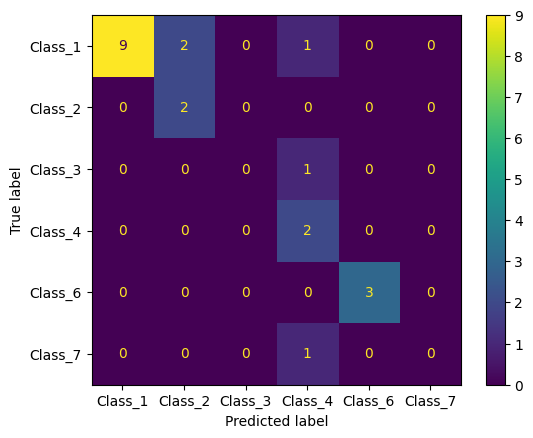

In [14]:
# Convert one-hot encoded y_test and y_pred back to original class labels
y_test_classes = y_test.values.argmax(axis=1) + 1
y_pred_classes = y_pred.argmax(axis=1) + 1

cm = confusion_matrix(y_test_classes, y_pred_classes)

unique_classes = np.unique(np.concatenate((y_test_classes, y_pred_classes)))
display_labels = [f'Class_{int(i)}' for i in unique_classes]

display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels)
display.plot()
plt.show()


Acurácia com 20 neurons: 0.7619047619047619


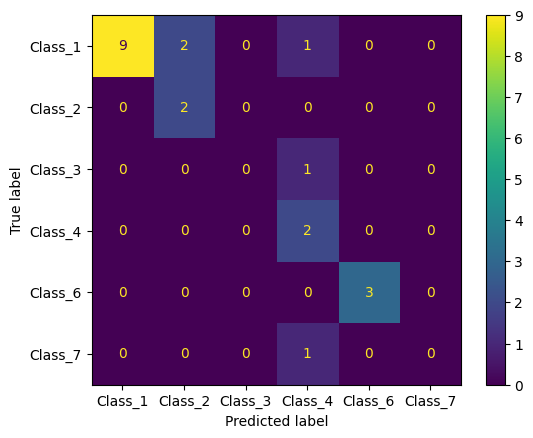


Classes =  [0 1 2 3 4 5 6]
Erro =  1.307891782128424
Amostras visitadas =  569280
Atributos de entrada =  6
N ciclos =  7116
N de camadas =  3
Tamanhos das camadas ocultas:  20
N de neurons saida =  7
F de ativação =  logistic

Acurácia com 50 neurons: 0.7619047619047619


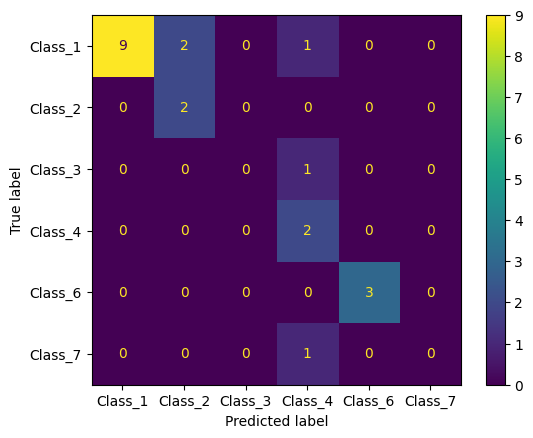


Classes =  [0 1 2 3 4 5 6]
Erro =  1.3077056680348669
Amostras visitadas =  415040
Atributos de entrada =  6
N ciclos =  5188
N de camadas =  3
Tamanhos das camadas ocultas:  50
N de neurons saida =  7
F de ativação =  logistic

Acurácia com 100 neurons: 0.7619047619047619


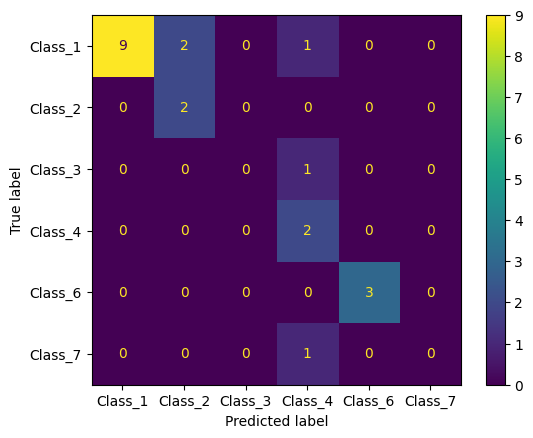


Classes =  [0 1 2 3 4 5 6]
Erro =  1.3075983078196067
Amostras visitadas =  325280
Atributos de entrada =  6
N ciclos =  4066
N de camadas =  3
Tamanhos das camadas ocultas:  100
N de neurons saida =  7
F de ativação =  logistic

Acurácia com (20, 20) neurons: 0.7619047619047619


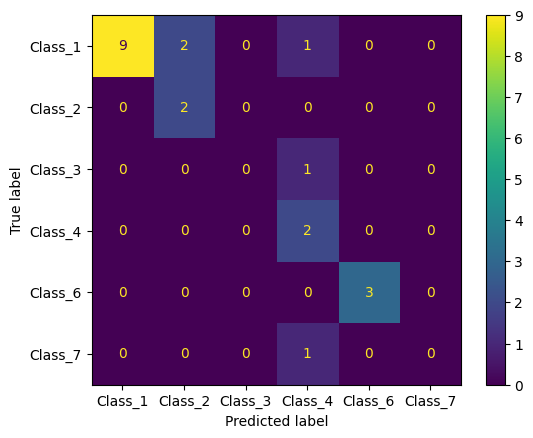


Classes =  [0 1 2 3 4 5 6]
Erro =  1.3079702437217844
Amostras visitadas =  557200
Atributos de entrada =  6
N ciclos =  6965
N de camadas =  4
Tamanhos das camadas ocultas:  (20, 20)
N de neurons saida =  7
F de ativação =  logistic

Acurácia com (50, 20) neurons: 0.7619047619047619


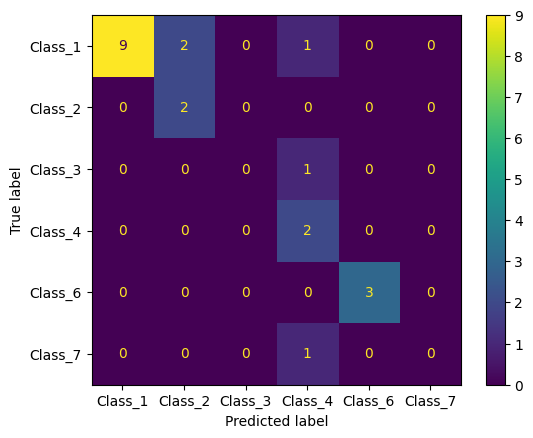


Classes =  [0 1 2 3 4 5 6]
Erro =  1.3080242206579344
Amostras visitadas =  512560
Atributos de entrada =  6
N ciclos =  6407
N de camadas =  4
Tamanhos das camadas ocultas:  (50, 20)
N de neurons saida =  7
F de ativação =  logistic

Acurácia com (100, 20) neurons: 0.7619047619047619


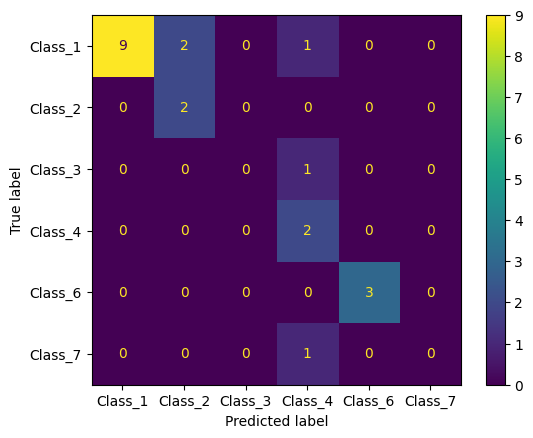


Classes =  [0 1 2 3 4 5 6]
Erro =  1.308053450913886
Amostras visitadas =  516400
Atributos de entrada =  6
N ciclos =  6455
N de camadas =  4
Tamanhos das camadas ocultas:  (100, 20)
N de neurons saida =  7
F de ativação =  logistic

Acurácia com (100, 50) neurons: 0.7619047619047619


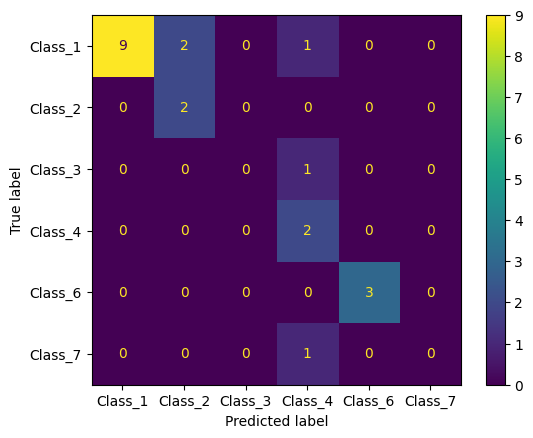


Classes =  [0 1 2 3 4 5 6]
Erro =  1.307828427854867
Amostras visitadas =  341120
Atributos de entrada =  6
N ciclos =  4264
N de camadas =  4
Tamanhos das camadas ocultas:  (100, 50)
N de neurons saida =  7
F de ativação =  logistic


In [15]:
for tam_camada_oculta in [20, 50, 100, (20, 20), (50, 20), (100, 20), (100, 50)]:
    mlp = MLPClassifier(
        hidden_layer_sizes = tam_camada_oculta,
        max_iter=8000,
        tol=1e-6,
        activation='logistic')
    
    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\nAcurácia com", mlp.hidden_layer_sizes, "neurons:", accuracy)
    
    y_test_classes = y_test.values.argmax(axis=1) + 1
    y_pred_classes = y_pred.argmax(axis=1) + 1

    cm = confusion_matrix(y_test_classes, y_pred_classes)

    unique_classes = np.unique(np.concatenate((y_test_classes, y_pred_classes)))
    display_labels = [f'Class_{int(i)}' for i in unique_classes]

    display = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=display_labels)
    
    display.plot()
    plt.show()
    
    print("\nClasses = ", mlp.classes_)     # lista de classes
    print("Erro = ", mlp.loss_)    # fator de perda (erro)
    print("Amostras visitadas = ", mlp.t_)     # número de amostras de treinamento visitadas
    print("Atributos de entrada = ", mlp.n_features_in_)   # número de atributos de entrada (campos de X)
    print("N ciclos = ", mlp.n_iter_)      # númerode iterações no treinamento
    print("N de camadas = ", mlp.n_layers_)    # número de camadas da rede
    print("Tamanhos das camadas ocultas: ", mlp.hidden_layer_sizes)
    print("N de neurons saida = ", mlp.n_outputs_)   # número de neurons de saida
    print("F de ativação = ", mlp.out_activation_)  # função de ativação utilizada